In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
data = pd.read_csv(r"C:\Users\User\Documents\League of Legends Champion Stats 12.1 (1).csv", sep = ";", header = 0)
data.dropna(inplace = True)
head = data.head()
print(head)
print(data.columns.tolist())

     Name     Class Role Tier  Score  Trend   Win %  Role % Pick %   Ban %   
0  Aatrox   Fighter  TOP    A  58.25   6.52  49.97%  94.62%  4.43%   2.03%  \
1    Ahri      Mage  MID    A  53.21  -0.24  49.93%  93.47%  4.62%   1.04%   
2   Akali  Assassin  MID    S  65.30   6.51  48.59%  65.65%  8.16%  12.88%   
3   Akali  Assassin  TOP    A  57.87   3.34  48.57%  34.06%  4.24%  12.88%   
4  Akshan  Marksman  MID    S  59.85   0.65  51.46%  58.01%  4.83%  21.91%   

    KDA  
0  1.97  
1  2.56  
2  2.34  
3  2.04  
4  2.23  
['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']


In [35]:
#Convert strings to float
data['Win %'] = data['Win %'].str.rstrip('%').astype('float')
data['Role %'] = data['Role %'].str.rstrip('%').astype('float')
data['Pick %'] = data['Pick %'].str.rstrip('%').astype('float')
data['Ban %'] = data['Ban %'].str.rstrip('%').astype('float')
print(data.dtypes)

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object


In [36]:
#See role vs win rate and see which roles have the highest win rates
role_win = data.groupby(["Role"])['Win %'].mean()
print(role_win)

Role
ADC        50.821852
JUNGLE     49.816957
MID        50.331379
SUPPORT    49.661220
TOP        49.830339
Name: Win %, dtype: float64


In [37]:
#See how many champions play each role
champ_roles = data.groupby(['Role']).Name.count().reset_index()
print(champ_roles)

      Role  Name
0      ADC    27
1   JUNGLE    46
2      MID    58
3  SUPPORT    41
4      TOP    59


In [38]:
sorted_role = data.sort_values(by = ['Score'], ascending= False)
print(sorted_role)

           Name     Class     Role Tier  Score  Trend  Win %  Role %  Pick %   
69         Jhin  Marksman      ADC  God  94.23   3.23  51.03   99.02   24.55  \
96         Lulu   Support  SUPPORT  God  93.56   0.75  50.84   97.72   14.30   
90      Lee Sin   Fighter   JUNGLE  God  91.89   0.28  48.45   96.61   15.29   
171  Tahm Kench   Support      TOP  God  91.80  21.07  51.28   92.57    6.48   
224         Zed  Assassin      MID  God  90.50  -0.27  50.87   67.21    8.84   
..          ...       ...      ...  ...    ...    ...    ...     ...     ...   
162     Skarner   Fighter      TOP    D  23.89  -6.83  48.90   22.21    0.18   
157     Shyvana   Fighter      TOP    D  23.83 -11.61  49.83   12.59    0.21   
137      Rengar  Assassin      TOP    D  22.41  -8.95  47.43   20.91    0.91   
143        Ryze      Mage      TOP    D  14.30  -7.36  45.91   16.26    0.43   
118        Olaf   Fighter      TOP    D  11.03  -6.16  45.46   15.64    0.27   

     Ban %   KDA  
69    5.81  3.01  
9

In [39]:
#Sort by Class
champ_class = data.groupby(['Class'])['Win %'].mean()
print(champ_class)

Class
Assassin    49.527308
Fighter     49.899559
Mage        50.042581
Marksman    50.139032
Support     50.653125
Tank        50.386071
Name: Win %, dtype: float64


Plot pie chart of role ditribution


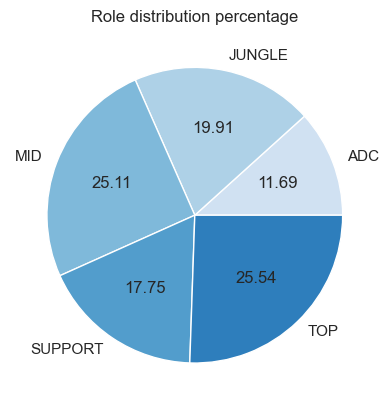

In [40]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(champ_roles)))
plt.pie(champ_roles.Name, labels = champ_roles.Role, colors= colors, autopct='%.2f')
plt.title('Role distribution percentage')
plt.show()

We want to predict the score, see if there are graphs that do not follow a normal distribution

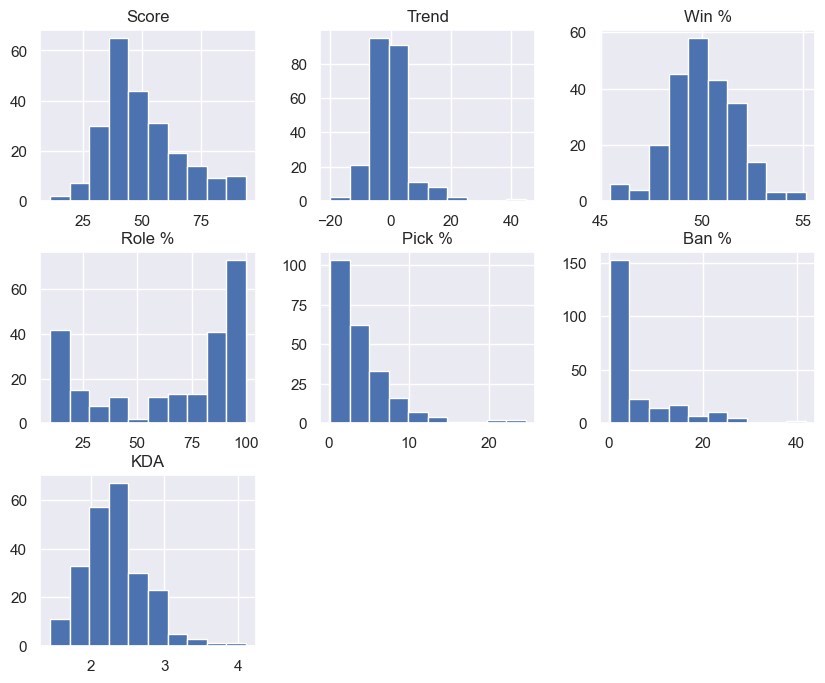

In [41]:
sns.set_theme()
data.hist(figsize= (10, 8))
plt.show()

            Score       Trend       Win %      Role %      Pick %       Ban %   
count  231.000000  231.000000  231.000000  231.000000  231.000000  231.000000  \
mean    50.111299   -0.225584   50.039351   64.370606    4.207273    5.888442   
std     16.481046    6.426109    1.658744   32.462138    4.096459    7.756444   
min     11.030000  -20.170000   45.460000   10.090000    0.180000    0.160000   
25%     39.010000   -3.445000   49.050000   29.620000    1.255000    0.820000   
50%     46.690000   -0.810000   49.910000   80.130000    3.050000    2.390000   
75%     59.355000    2.110000   51.090000   92.665000    5.815000    7.655000   
max     94.230000   44.710000   55.140000   99.760000   24.550000   41.880000   

              KDA  
count  231.000000  
mean     2.332944  
std      0.415500  
min      1.450000  
25%      2.040000  
50%      2.300000  
75%      2.545000  
max      4.110000  


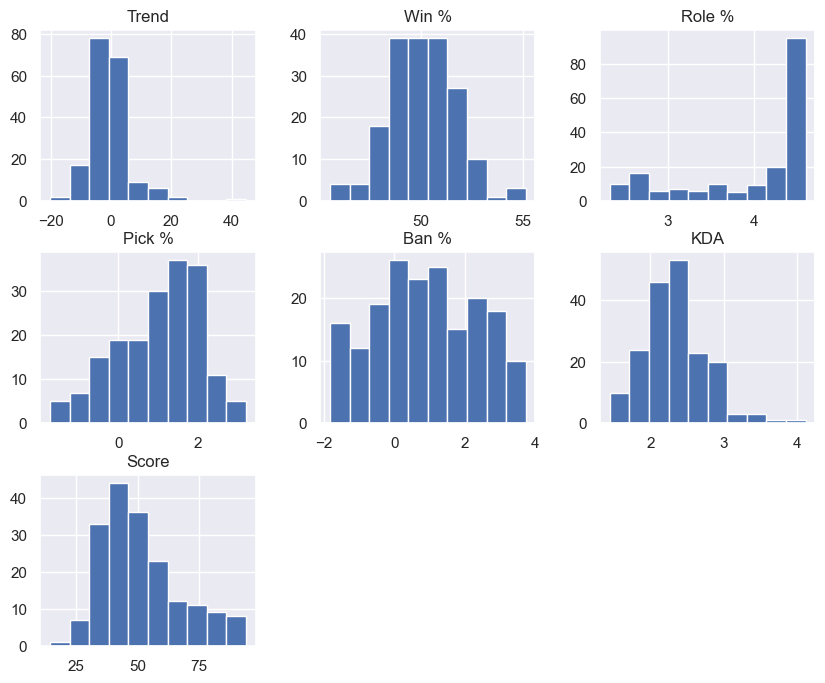

In [42]:
#Machine learning model to test the score given other variables
print(data.describe())

X = data.drop(['Tier', 'Name', 'Score', 'Class', 'Role'], axis = 1)
y = data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sns.set_theme()

train_data = X_train.join(y_train)

#Since these variables had graphs that did not follow the normal distribution, we take the log of them to see if
#it produces a better graph
train_data['Role %'] = np.log(train_data['Role %'])
train_data['Pick %'] = np.log(train_data['Pick %'])
train_data['Ban %'] = np.log(train_data['Ban %'])
train_data.hist(figsize= (10, 8))
plt.show()

Make a heatmap matrix showing correlation between variables


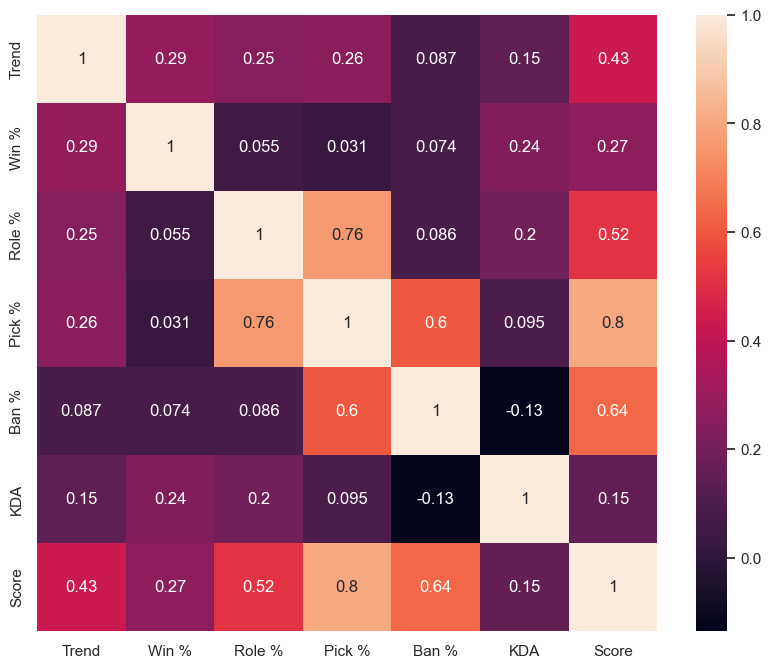

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot = True)
plt.show()

Predict with a Linear regression model

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Get the mean squared error as well as the r^2 
y_pred_train = regressor.predict(X_train)
print(y_pred_train)

y_pred_test = regressor.predict(X_test)
print(y_pred_test)

msquare_train = mean_squared_error(y_train,y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

msquare_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


results = pd.DataFrame(["LR", msquare_train, r2_train, msquare_test, r2_test]).transpose()
results.columns = ["Regression", "MSE_train", "R2_train", "MSE_test", "R2_test"]
print(results)

[ 52.14845233  57.39008551  49.14034668  50.97978582  47.88669267
  29.30777739  80.96108352  61.4573315   49.37233103  40.16911711
  71.45792357  22.52688943  45.85000349  50.81467217  64.44819904
  32.63014992  36.0652436   56.76936179  58.9601235   86.52363271
  52.67161893  48.42962244  44.1401854   73.76300569  42.64326606
  35.2545233   26.82338308  42.59702079  64.79420734  38.55171662
  32.04342568  48.84483658  30.9196733   32.43475365  39.07574227
  41.28481633  65.25779146  34.62840497  53.91320463  35.24927162
  59.18900405  46.95007266  37.8086058   49.6451118   53.36124391
  41.87314815  51.68316631  51.69491162  40.92759087  56.31914656
  36.62657379  28.47732557  54.15773424  53.38999259  40.71200983
  69.85219632  44.60725517  61.62771056  59.62097875  65.30726321
  66.10608886  43.34983784  47.34783655  42.40149124  31.14502927
  39.83671154  60.19443993  55.54767947  36.39743855  32.9335871
  52.40456344  68.14922763  52.2380449   40.68394917  76.94970944
  50.769528

Visualizing the data using a scatter plot with regression line 

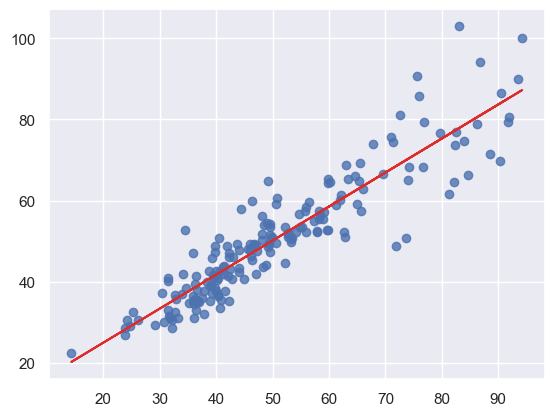

In [45]:

plt.scatter(x = y_train, y = y_pred_train, alpha = 0.8)

#Trend line
line = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(line)

plt.plot(y_train, p(y_train), c = "#dc2c2c")
plt.plot()
plt.show()